In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xg
import joblib

In [2]:
a=pd.read_csv('C:\\Users\\varun\\Downloads\\final_data1.csv')
a=a.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

In [3]:
a.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'Dest',
       'ArrDelayMinutes', 'Origin', 'time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'airport'],
      dtype='object')

In [4]:
a

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,...,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,airport
0,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,14747,...,10,1030,0,23,8,34,29,65,2016-01-01,SEA
1,2016-01-02,1,2016,1,2,737.0,0.0,745,0.0,14747,...,10,1024,0,25,8,37,33,63,2016-01-02,SEA
2,2016-01-03,1,2016,1,3,743.0,0.0,745,0.0,14747,...,10,1018,0,20,7,32,28,64,2016-01-03,SEA
3,2016-01-04,1,2016,1,4,737.0,0.0,745,0.0,14747,...,4,1010,93,33,8,35,31,94,2016-01-04,SEA
4,2016-01-05,1,2016,1,5,708.0,0.0,710,0.0,14747,...,6,1001,100,35,10,38,35,91,2016-01-05,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,2017-12-17,4,2017,12,17,1024.0,0.0,1030,0.0,13930,...,8,1020,100,31,16,32,26,98,2017-12-17,ORD
1851432,2017-12-17,4,2017,12,17,1148.0,0.0,1156,0.0,12892,...,10,1014,0,25,19,58,56,27,2017-12-17,LAX
1851433,2017-12-17,4,2017,12,17,739.0,0.0,737,2.0,12266,...,10,1020,100,47,9,49,48,91,2017-12-17,IAH
1851434,2017-12-17,4,2017,12,17,1632.0,0.0,1638,0.0,11298,...,10,1019,95,44,13,50,48,78,2017-12-17,DFW


In [5]:
X=a.drop(['DepDel15'],axis=1)
X.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID',
       'ArrTime', 'CRSArrTime', 'ArrDel15', 'Dest', 'ArrDelayMinutes',
       'Origin', 'time', 'windspeedKmph', 'winddirDegree', 'weatherCode',
       'precipMM', 'visibility', 'pressure', 'cloudcover', 'DewPointF',
       'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date', 'airport'],
      dtype='object')

In [6]:
y=a[['DepDel15']]
y.value_counts()

DepDel15
0.0         1479357
1.0          372079
dtype: int64

In [7]:
X=a.drop(['FlightDate', 'Quarter','Origin', 'time','Dest', 'date', 'airport','ArrTime', 'ArrDel15','ArrDelayMinutes','DepTime','DepDelayMinutes','WindGustKmph','WindChillF'],axis=1)
X

,Year,Month,DayofMonth,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,tempF,humidity
0,2016,1,1,0.0,745,14747,12478,1602,7,108,113,0.0,10,1030,0,23,34,65
1,2016,1,2,0.0,745,14747,12478,1602,7,118,113,0.0,10,1024,0,25,37,63
2,2016,1,3,0.0,745,14747,12478,1602,6,83,113,0.0,10,1018,0,20,32,64
3,2016,1,4,0.0,745,14747,12478,1602,5,9,266,0.2,4,1010,93,33,35,94
4,2016,1,5,0.0,710,14747,12478,1527,5,62,266,0.1,6,1001,100,35,38,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,2017,12,17,0.0,1030,13930,12266,1326,14,105,122,0.0,8,1020,100,31,32,98
1851432,2017,12,17,0.0,1156,12892,11618,2017,17,31,113,0.0,10,1014,0,25,58,27
1851433,2017,12,17,0.0,737,12266,11292,909,7,24,122,0.0,10,1020,100,47,49,91
1851434,2017,12,17,0.0,1638,11298,11292,1747,8,171,122,0.0,10,1019,95,44,50,78


In [8]:
X_class=X.drop(['DepDel15'],axis=1)
y_class=X['DepDel15']

In [9]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=10)

In [10]:
X,y=smote.fit_resample(X_class,y_class)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
from sklearn.metrics import accuracy_score
rfc_predict=rfc.predict(X_class)
rfc_accuracy=accuracy_score(y_class,rfc_predict)

In [14]:
rfc_accuracy

0.9583863552399327

In [15]:
X_class['dep_delay']=rfc_predict

In [16]:
X_class

,Year,Month,DayofMonth,CRSDepTime,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,tempF,humidity,dep_delay
0,2016,1,1,745,14747,12478,1602,7,108,113,0.0,10,1030,0,23,34,65,0.0
1,2016,1,2,745,14747,12478,1602,7,118,113,0.0,10,1024,0,25,37,63,0.0
2,2016,1,3,745,14747,12478,1602,6,83,113,0.0,10,1018,0,20,32,64,0.0
3,2016,1,4,745,14747,12478,1602,5,9,266,0.2,4,1010,93,33,35,94,0.0
4,2016,1,5,710,14747,12478,1527,5,62,266,0.1,6,1001,100,35,38,91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,2017,12,17,1030,13930,12266,1326,14,105,122,0.0,8,1020,100,31,32,98,0.0
1851432,2017,12,17,1156,12892,11618,2017,17,31,113,0.0,10,1014,0,25,58,27,0.0
1851433,2017,12,17,737,12266,11292,909,7,24,122,0.0,10,1020,100,47,49,91,0.0
1851434,2017,12,17,1638,11298,11292,1747,8,171,122,0.0,10,1019,95,44,50,78,0.0


In [17]:
X_class1=a.drop(['FlightDate', 'Quarter','Origin', 'time','Dest', 'date', 'airport','DepTime','WindGustKmph','WindChillF'],axis=1)

In [18]:
X_class2=X_class[X_class['dep_delay']==1]

In [19]:
X_cl=pd.merge(X_class2,X_class1,how='left')

In [20]:
X_cl

,Year,Month,DayofMonth,CRSDepTime,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph,winddirDegree,weatherCode,...,cloudcover,DewPointF,tempF,humidity,dep_delay,DepDel15,DepDelayMinutes,ArrTime,ArrDel15,ArrDelayMinutes
0,2016,1,14,645,14747,12478,1506,10,162,116,...,75,38,41,90,1.0,1.0,52.0,1500.0,1.0,31.0
1,2016,1,17,645,14747,12478,1506,14,130,266,...,100,39,45,81,1.0,1.0,43.0,1500.0,1.0,26.0
2,2016,1,22,645,14747,12478,1506,17,184,353,...,100,42,47,86,1.0,1.0,344.0,2000.0,1.0,335.0
3,2016,1,2,1825,12478,14747,2150,19,244,113,...,0,29,38,73,1.0,1.0,64.0,2200.0,1.0,56.0
4,2016,1,3,1825,12478,14747,2150,20,277,122,...,67,33,38,74,1.0,1.0,31.0,2200.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360165,2017,12,17,1320,14771,11292,1647,7,69,113,...,0,30,55,38,1.0,1.0,17.0,1700.0,1.0,23.0
360166,2017,12,17,1424,12266,11618,1859,5,91,119,...,88,50,59,74,1.0,1.0,77.0,1900.0,1.0,35.0
360167,2017,12,17,925,14771,12266,1518,6,42,113,...,0,28,48,45,1.0,1.0,16.0,1500.0,0.0,14.0
360168,2017,12,17,1520,14107,13930,1945,13,108,116,...,4,42,65,43,1.0,1.0,80.0,2000.0,1.0,61.0


In [35]:
X_reg=X_cl.drop(['DepDelayMinutes','DepDel15','dep_delay','ArrDelayMinutes'],axis=1)

In [36]:
y_reg=X_cl['DepDelayMinutes']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg,test_size=0.2,random_state=0)

In [24]:
xg=joblib.load('regrssion_model.joblib')

In [25]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
xg_pred=xg.predict(X_test)

In [27]:
r2_xg=r2_score(y_test,xg_pred)
mae_xg=mean_absolute_error(y_test,xg_pred)
r2_xg,mae_xg

(0.8957096468959659, 14.9000777970621)

In [28]:
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [29]:
etr_pred=etr.predict(X_test)

In [30]:
r2_etr=r2_score(y_test,etr_pred)
mae_etr=mean_absolute_error(y_test,etr_pred)
r2_etr,mae_etr

(0.8994366700522749, 15.083392634033931)

In [37]:
pred_delay=etr.predict(X_reg)

In [38]:
X_reg['predicted_delay']=pred_delay

In [39]:
r2_score(pred_delay,y_reg)

0.9792691699605617

In [40]:
X_reg['depDelay']=y_reg

In [41]:
a100=X_reg[(X_reg['predicted_delay']>=15) & (X_reg['predicted_delay']<100)]
X=a100['depDelay']
a100=a100.drop(['depDelay'],axis=1)
X_ra=a100.drop(['predicted_delay'],axis=1)
y_ra=a100['predicted_delay']
res0=etr.predict(X_ra)
r2_etr_100=r2_score(X,res0)
mae_etr_100=mean_absolute_error(X,res0)
r2_etr_100,mae_etr_100

(0.8653038385180922, 2.7934877887935508)

In [42]:
a200=X_reg[(X_reg['predicted_delay']>=100) & (X_reg['predicted_delay']<200)]
X=a200['depDelay']
a200=a200.drop(['depDelay'],axis=1)
X_ra=a200.drop(['predicted_delay'],axis=1)
y_ra=a200['predicted_delay']
res1=etr.predict(X_ra)
r2_etr_200=r2_score(X,res1)
mae_etr_200=mean_absolute_error(X,res1)
r2_etr_200,mae_etr_200

(0.7775382108768113, 4.375826957216059)

In [43]:
a500=X_reg[(X_reg['predicted_delay']>=200) & (X_reg['predicted_delay']<500)]
X=a500['depDelay']
a500=a500.drop(['depDelay'],axis=1)
X_ra=a500.drop(['predicted_delay'],axis=1)
y_ra=a500['predicted_delay']
res=etr.predict(X_ra)
r2_etr_500=r2_score(X,res)
mae_etr_500=mean_absolute_error(X,res)
r2_etr_500,mae_etr_500

(0.9501419802630984, 4.907071310637629)

In [44]:
a1000=X_reg[(X_reg['predicted_delay']>=500) & (X_reg['predicted_delay']<1000)]
X=a1000['depDelay']
a1000=a1000.drop(['depDelay'],axis=1)
X_ra=a1000.drop(['predicted_delay'],axis=1)
y_ra=a1000['predicted_delay']
res=etr.predict(X_ra)
r2_etr_1000=r2_score(X,res)
mae_etr_1000=mean_absolute_error(X,res)
r2_etr_1000,mae_etr_1000

(0.81910919291727, 11.355539358600582)

In [45]:
a2000=X_reg[(X_reg['predicted_delay']>=1000) & (X_reg['predicted_delay']<2000)]
X=a2000['depDelay']
a2000=a2000.drop(['depDelay'],axis=1)
X_ra=a2000.drop(['predicted_delay'],axis=1)
y_ra=a2000['predicted_delay']
res=etr.predict(X_ra)
r2_etr_2000=r2_score(X,res)
mae_etr_2000=mean_absolute_error(X,res)
r2_etr_2000,mae_etr_2000

(0.9646025533319047, 9.590909090909092)

In [64]:
if len(X_reg[(X_reg['predicted_delay']>=2000)])>1:
    a2k=X_reg[(X_reg['predicted_delay']>=2000)]
    X=a2k['depDelay']
    a2k=a2k.drop(['depDelay'],axis=1)
    X_ra=a2k.drop(['predicted_delay'],axis=1)
    y_ra=a2k['predicted_delay']
    res=etr.predict(X_ra)
    r2_etr_2k=r2_score(X,res)
    mae_etr_2k=mean_absolute_error(X,res)
    r2_etr_2k,mae_etr_2k
else:
    print('no samples')

no samples


In [47]:
a100.shape

(269916, 20)

In [48]:
a200.shape

(42999, 20)

In [49]:
a500.shape

(12719, 20)

In [50]:
a1000.shape

(1029, 20)

In [51]:
a2000.shape

(132, 20)

In [52]:
a2k.shape

(0, 20)

In [56]:
range={'15-100':269916,'100-200':42999,'200-500':12719,'500-1000':1029,'1000-2000':132,'2000<':0}

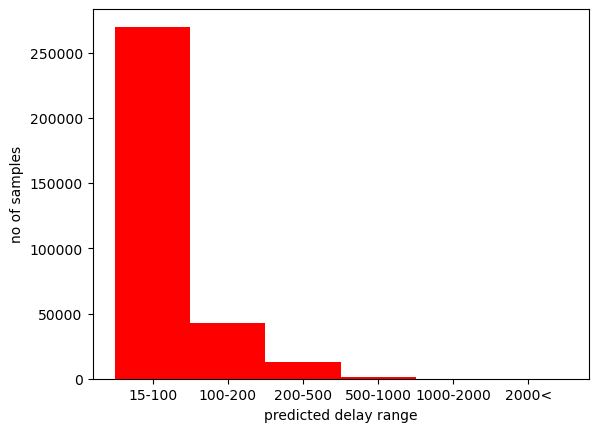

In [57]:
a=list(range.keys())
b=list(range.values())
plt.bar(a,b,width=1,color='red')
plt.xlabel('predicted delay range')
plt.ylabel('no of samples')
plt.show()